In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [61]:
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [63]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define the CNN model
model = Sequential()

# Input layer
model.add(Input(shape=(32, 32, 3)))

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [65]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 60ms/step - accuracy: 0.2794 - loss: 1.9269 - val_accuracy: 0.4967 - val_loss: 1.3865
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.4953 - loss: 1.3945 - val_accuracy: 0.5869 - val_loss: 1.1542
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.5719 - loss: 1.2054 - val_accuracy: 0.6310 - val_loss: 1.0523
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6129 - loss: 1.0973 - val_accuracy: 0.6424 - val_loss: 1.0172
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.6420 - loss: 1.0186 - val_accuracy: 0.6727 - val_loss: 0.9407
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 27ms/step - accuracy: 0.6719 - loss: 0.9431 - val_accuracy: 0.6809 - val_loss: 0.9248
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.6948 - loss: 0.8793 - val_accuracy: 0.6919 - val_loss: 0.8968
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7089 - loss: 0.8367 - 

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred_classes, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

    airplane       0.70      0.79      0.74      1000
  automobile       0.78      0.90      0.83      1000
        bird       0.52      0.66      0.58      1000
         cat       0.59      0.43      0.50      1000
        deer       0.65      0.68      0.66      1000
         dog       0.72      0.50      0.59      1000
        frog       0.63      0.88      0.73      1000
       horse       0.84      0.66      0.74      1000
        ship       0.83      0.80      0.82      1000
       truck       0.87      0.72      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

[[787  25  80   6  13   1  15   6  48  19]
 [ 23 896   7   1   1   0  16   2  27  27]
 [ 74   6 656  24  71  38 103  13  10   5]
 [ 23  18 126 430  87  93 164  22  23  14]
 [ 29   6  93  39 682   9 10

In [ ]:
from sklearn.metrics import confusion_matrix
# Assuming y_pred is your model predictions and y_true are the true labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Set up the figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],
            yticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                         'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [57]:
# Extract metrics from classification report
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='weighted')
accuracy = np.sum(y_pred_classes == y_true) / len(y_true)
# For specificity, we calculate TN for each class
tn = cm.diagonal()
fp = cm.sum(axis=0) - tn
fn = cm.sum(axis=1) - tn

specificity = tn / (tn + fp)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Specificity: {specificity}')


Accuracy: 0.7282
Precision: 0.7286
Recall: 0.7282
F1 Score: 0.7257
Specificity: [0.77031093 0.81749765 0.72050562 0.52014324 0.67559809 0.68482039
 0.7826942  0.76256158 0.79294336 0.75868373]


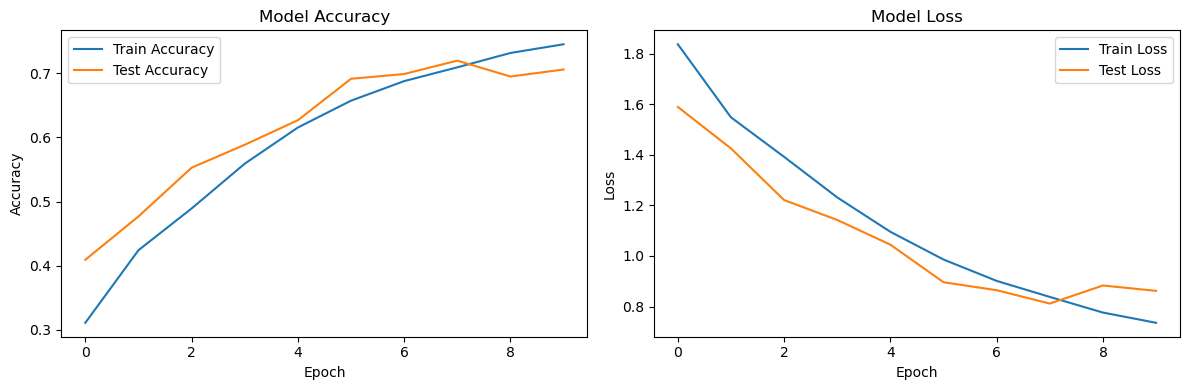

In [49]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
